## Laboratory 11

# Nonlinear Dynamical Model of a Quadrotor

## 11.1 Introduction

Flight dynamics can be modelled using the following two approaches: using the equation of energy conservation and the Euler-Lagrange formalism, or describing the movement (rotation and translation) of a rigid body in an inertial space, based on the Newton-Euler approach. The former procedure determines the translational dynamics in a simple way, however the rotational dynamics remains at a higher level of description. On the other hand, the Newton-Euler approach
provides a complete relationship between rotor speed inputs and the translational and rotational dynamics
of the vehicle.

Modelling dynamics commonly starts from the assumption of a single-rigid-body representation. However, when focusing e.g. only on the kinematics of the vehicle, a point mass model is also enough. On the other hand, more complex architectures (e.g. flapping-wing) may require non-rigid-body models. Dealing with single-rigid-body models, it is also common to account for additional dynamics separately. Specific to multirotors and helicopters, propeller blade flapping and induced drag are taken further into consideration.

Consider a Qadcopter Drone from Figure 11.1. The goal is to model and control the drone and test the results in simulations.



<center>
    <figure class="image">
      <img src="artwork/drone/0.PNG" width=50% />
      <figcaption>Figure 11.1: Parrot AR 2.0 Drone </figcaption>
    </figure>
</center>

## 11.2 Basic notations and transformations

Concerning remotely controlled vehicles, two basic coordinate systems are relevant: a reference frame $\mathcal{E}$ , called Earth frame and the body frame $\mathcal{B}$, the frame attached to the quadrotor. Earth frame $\mathcal{E}$ is an inertial frame of reference with its origin fixed to the home location. The body frame $\mathcal{B}$ is the coordinate system attached to the center of mass of the quadrotor, as shown in Fig.11.2: the axes indicate the ahead (x axis), to the left (y axis), and upwards (z axis) directions. The kinematics of the vehicle are presented in the Earth frame, whereas the dynamics are studied with respect to the body frame. Whenever the frame is relevant in case of a variable, it will be marked by superscripts like $(\cdot)^E$ or $(\cdot)^B$.

<center>
    <figure class="image">
      <img src="artwork/drone/1.png" width=60% />
      <figcaption>Figure 11.2: Quadrotor model </figcaption>
    </figure>
</center>

The pose of the vehicle in the Earth frame $\mathcal{E}$ is defined as:

\begin{equation}\label{pose}
P^E = [\xi^E, \eta^E]^T = [x,y,z,\phi, \theta, \psi]^T \text{ (1)}
\end{equation}

where $\xi^E = [x, y, z]^T $ marks the position and $\eta^E = [\phi, \theta, \psi]^T$ the orientation. The orientation is expressed using the Euler angles roll ($\phi$), pitch ($\theta$), yaw ($\psi$).

The velocities of the quadrotor are defined in the body frame $\mathcal{B}$:

\begin{equation}\label{velocities}
V^B = [\rho^B, \pi^B]^T = [u,v,w,p,q,r]^T \text{ (2)}
\end{equation}

To transform a vector defined in a frame into the another frame, the rotational matrix R can be used:

\begin{equation}
R_B^E(\eta)=\begin{bmatrix}
c(\theta)c(\psi) & c(\psi)s(\theta)s(\phi) - c(\phi)s(\psi) & s(\phi)s(\psi) + c(\phi)c(\psi)s(\theta) \\
c(\theta)s(\psi) & c(\phi)c(\psi) + s(\theta)s(\phi)s(\psi) & c(\phi)s(\theta)s(\psi) - c(\psi)s(\phi) \\
-s(\theta) & c(\theta)s(\phi)  & c(\theta)c(\phi)
\end{bmatrix} \text{ (3)}
\end{equation}


where $s(\cdot)$ and $c(\cdot)$ are shorthand notations for the sine and cosine operators, and $R_B^E$ marks that the rotation is performed from body frame to Earth frame. However, since R is an orthogonal matrix, we have the property that $R^{-1} = R^T$ , due to which the transpose of $R_B^E$ is  $R_E^B$.

The relationship between velocities $\rho^B$ and $\dot{\xi}^E$ can be written using $R_B^E$:


\begin{equation}\label{rhoandxi}
\dot{\xi}^E = R_B^E \cdot \rho^B \text{ (4)}
\end{equation}

To relate angular velocities $\pi^B$ and $\dot{\eta}^E$, one can use the inverse of the translational matrix T:

\begin{equation}
T_E^B(\eta)=\begin{bmatrix}
1 & 0 & -s(\theta) \\
0 & c(\phi) & c(\theta)s(\phi) \\
0 & -s(\phi)  & c(\theta)c(\phi)
\end{bmatrix} \text{ (5)}
\end{equation}

Since $T_E^B$ is not orthogonal, calculating its inverse one obtains

\begin{equation}
T_B^E(\eta)=\begin{bmatrix}
1 & s(\phi)t(\theta) & c(\phi)t(\theta) \\
0 & c(\phi) & -s(\phi) \\
0 & -s(\phi)c(\theta)  & c(\phi)/c(\theta)
\end{bmatrix} \text{ (6)}
\end{equation}

where $t(\cdot)$ denotes the tangent operator. Then, we have:

\begin{equation}\
\dot{\eta}^E = T_B^E \cdot \pi^B \text{ (7)}
\end{equation}

Note that if working with small angles, i.e. in near-hovering mode of the quadrotor, matrix T can be simplified to the identity matrix, which makes $\dot{\eta}^E = \pi^B$

## 11.3 Quadrotor dynamics. Euler-Lagrange approach

The dynamical model that we present builds upon the near-hovering behaviour of a quadrotor. Also, the quadrotor is modelled as a single rigid body, having a symmetrical structure, with the origin of the body frame in the center of gravity. Furthermore, the propellers are assumed to be rigid objects.

The Euler-Lagrange approach starts with defining the Lagrangian of the quadrotor. Using vectors $P^E$, $\xi^E$ and $\eta^E$ from (1), the Lagrangian of a quadrotor can be written as

\begin{equation}\
L(P^E,\dot{P^E}) = E_{transl} + E_{rot} - E_{pot} = 0.5m\dot{\xi}^T\dot{\xi} + 0.5\dot{\eta}^TJ(\eta)\dot{\eta}+mgz       \text{ (8)}
\end{equation}


with the three terms the total translational, rotational and potential (gravitational) energy acting on the
quadrotor, and $J$ the inertia matrix with respect to the Euler angles $\eta$:

\begin{equation}
J(\eta)=T_E^B(\eta)^T\begin{bmatrix}
Ixx & 0 & 0 \\
0 & Iyy & 0 \\
0 & 0  & Izz
\end{bmatrix}T_E^B(\eta) = \begin{bmatrix}
I_x & 0 & -I_xs(\theta) \\
0 & I_yc^2(\phi)+I_zs^2(phi) & (I_y - I_z)c(\phi)s(phi)c(theta) \\
-I_xs(\theta) & (I_y - I_z)x(\phi)s(phi)c(theta) &  I_xs^2(\theta)+I_ys^2(phi)c^2(theta)+I_zc^2(phi)c^2(theta)
\end{bmatrix}  \text{ (9)}
\end{equation}


Ix,Iy and Iz are the moments of inertia corresponding to each axis, and $T_E^B$ is the translational matrix from frame $\mathcal{E}$ to frame $\mathcal{B}$.

The dynamic equations of motion can be formulated using the Euler-Lagrange equation:

\begin{equation}
\frac{d}{dt}\frac{\partial L}{\partial \dot{P^E}}-\frac{\partial L}{\partial P^E}=\begin{bmatrix}
F_{transl} \\
F_{rot} 
\end{bmatrix} \text{ (10)}
\end{equation}

with $F_{transl}$ the translational and Frot rotational forces acting on the quadrotor. Now, as there are no cross terms between the translational and rotational parts in the above relation, using the definition of the Lagrangian, (10) can be decomposed in the following two relations:

\begin{equation}
F_{transl} = \frac{d}{dt}\frac{\partial (E_{transl}-E_{pot})}{\partial \dot{P^E}}-\frac{\partial (E_{transl}-E_{pot})}{\partial P^E} \text{ (11)}
\end{equation}

\begin{equation}
F_{rot} = \frac{d}{dt}\frac{\partial E_{rot}}{\partial \dot{P^E}}-\frac{\partial E_{rot}}{\partial P^E} \text{ (12)}
\end{equation}

which after some mathematical operations results in:

\begin{equation}
F_{transl} = m\ddot{\xi} + \begin{bmatrix}
0 \\
0 \\
mg
\end{bmatrix}   \text{ (13)}
\end{equation}

\begin{equation}
F_{rot} = J(\eta)\ddot{\eta} + \dot{J}(\eta)\dot{\eta} - 0.5 \frac{d}{d\eta}(\dot{\eta}^TJ(\eta)\dot{\eta}) = J(\eta)\ddot{\eta} + C(\eta, \dot{\eta})\dot{\eta}  \text{ (14)}
\end{equation}



where $C(\eta, \dot{\eta})$ denotes the Coriolis term in the rotational dynamics, and can be expressed as:

\begin{equation}
C(\eta, \dot{\eta})=\begin{bmatrix}
c_{11} & c_{12} & c_{13} \\
c_{21} & c_{22} & c_{23} \\
c_{31} & c_{32} & c_{33}
\end{bmatrix}  \text{ (15)}
\end{equation}

with system of equations $(16)$:

\begin{equation}\
c_{11} = 0 
\end{equation} 

\begin{equation}\
c_{12} = (I_y - I_z)\dot{\theta}c(\phi)s(\phi) + \dot(\psi)s^2(\phi)c(\theta) + (I_z - I_y)\dot{\psi}c^2(\phi)c(\theta) - I_x\dot{\psi}c(\theta)
\end{equation} 

\begin{equation}\
c_{13} = (I_z - I_y)\dot{\psi}c^2(\theta)s(\phi)c(\phi)
\end{equation} 

\begin{equation}\
c_{21} = (I_z - I_y)\dot{\theta}s(\phi)c(\phi) + \dot{\psi}s^2(\phi)c(\theta) + (I_y - I_z)\dot{\psi}c^2(\phi)c(\theta) + I_x\dot{\psi}c(\theta)
\end{equation} 

\begin{equation}\
c_{22} =  (I_z - I_y)\dot{\phi}c^2(\phi)s(\phi) 
\end{equation} 

\begin{equation}\
c_{23} = -I_x\dot{\psi}s(\theta)c(\theta) + I_y\dot{\psi}s^2(\phi)s(\theta)c(\theta) + I_z\dot{\psi}c^2(\phi)c(\theta)
\end{equation} 

\begin{equation}\
c_{31} = (I_y - I_z)\dot{\psi}c^2(\theta)s(\phi)c(\phi) - I_x\dot{\theta}c(\theta)
\end{equation} 

\begin{equation}\
c_{32} = (I_z - I_y)(\dot{\theta}s(\phi)c(\phi)s(\theta) + \dot(\psi)s^2(\phi)c(\theta)) + (I_y - I_z)\dot{\psi}c^2(\phi)c(\theta) + I_x\dot{\psi}s(\theta)c(\theta) - I_y\dot{\psi}s^2(\phi)s(\theta)c(\theta) - I_z\dot{\psi}c^2(\phi)s(\theta)c(\theta)
\end{equation} 

\begin{equation}\
c_{33} = (I_y - I_z)\dot{\psi}c^2(\theta)s(\phi)c(\phi) + I_x\dot{\theta}s(\theta)c(\theta) - I_y\dot{\theta}s^2(\phi)s(\theta)c(\theta) - I_z\dot{\theta}c^2(\phi)s(\theta)c(\theta)
\end{equation} 



Now, for modelling the near-hovering operation, the translational forces can be
summarized as $F_{transl} = R_B^E \cdot [0,0,U_{coll}]^T$ . On the other hand, $F_{rot} = [U_{\phi}, U_{\theta}, U_{\psi}]$. From these relations, the dynamics of the quadrotor in near-hovering operation can be summarized as:

$$\begin{equation}
\left\{ 
  \begin{aligned}
    \ddot{x} = [c(\phi)s(\theta)c(\psi) + s(\phi)s(\psi)]\frac{U_{coll}}{m}\\
    \ddot{y} = [c(\phi)s(\theta)s(\psi) - s(\phi)c(\psi)]\frac{U_{coll}}{m}\\
    \ddot{z} = -g +c(\phi)c(\theta)\frac{U_{coll}}{m}\\
    \begin{bmatrix}
\ddot{\phi} \\
\ddot{\theta} \\
\ddot{\psi}
\end{bmatrix} = J^{-1}(\eta)\begin{bmatrix}
U_{\phi} \\
U_{\theta} \\
U_{\psi}
\end{bmatrix} - J^{-1}(\eta)C(\eta, \dot{\eta})\dot{\eta} \\
  \end{aligned}
  \right.
\end{equation} \text{ (17)}
$$

This model can be simplified considering that the near-hovering operation means small variations of angle $\alpha$, thus $sin(\alpha) = \alpha$ and $cos(\alpha) = 1$. Also, $U_{coll}$can be expressed as $U_{coll} = mg + \Delta U_{coll}$ where the variation of the collective forces is also assumed to be small. Thus, (17) can be simplified as:


$$\begin{equation}
\left\{ 
  \begin{aligned}
    \ddot{x} = \theta g\\
    \ddot{y} = -\phi g\\
    \ddot{z} = \frac{\Delta{U_{coll}}}{m}\\
    \ddot{\phi}   = \frac{1}{I_x}U_{\phi}\\
    \ddot{\theta} = \frac{1}{I_y}U_{\theta}\\
    \ddot{\psi}   = \frac{1}{I_z}U_{\psi}
  \end{aligned}
  \right.
\end{equation} \text{ (18)}
$$


##  11.4 Achieving flight

The dynamical model of a quadrotor accounts for inputs resulting from the forces and torques acting on the vehicle. In other words, the model takes as inputs the yawing, pitching and rolling of the quadrotor, and the collective lifting force. The relation between these inputs and individual motor torques and forces depends on the platform configuration in use. 

Quadrotors are commonly modelled using one of the two configurations presented in Fig. 11.3: “plus” configuration, when the quadrotor arms are aligned with the x and y axes; and “cross” configuration, when the quadrotor is rotated with 45° around the z axis compared to the previous configuration. Both configurations are valid and in use. The latter one is preferred when an ahead-looking camera is mounted on the cross, because the forward direction corresponds to the view direction of the camera. 

Motor numberings and corresponding angular velocities, marked with $\omega_i$, are presented in Fig 11.3

<center>
    <figure class="image">
      <img src="artwork/drone/2.png" width=100% />
      <figcaption>Figure 11.3: Quadrotor configuration: plus(left) and cross(right) </figcaption>
    </figure>
</center>

Define the forces and torques acting on each rotor as:

\begin{equation}\
F_i = b \cdot \omega_i^2  \text{ (19)}
\end{equation}  

\begin{equation}\
\tau_i = d \cdot \omega_i^2 \text{ (20)}
\end{equation}  


with $b$ the thrust coefficient, $d$ the drag coefficient, and $i$ the index of the rotor. Both the forces and torques act upwards along the z axis.

For both configurations, vertical displacement results from the collective force generated by the rotors, achieved with $\omega_1 = \omega_2 = \omega_3 = \omega_4$. Depending on the magnitude of the generated forces compared to gravity, the quadrotor can be lifted, landed or kept hovering. 

All the rotations result from the generated torques. Yaw rotation (changing angle $\psi$) results from the sum of the torques, and is achieved by having $\omega_1 = \omega_3$ and $\omega_2 = \omega_4$. In most cases of near hovering flights, the flight direction is altered by controlling the yaw angle of the vehicle.

In the plus configuration, horizontal displacement on the $x$ axis can be achieved by pitch rotation (changing angle $\theta$), which results from keeping $\omega_1 = \omega_3$ and setting $\omega_2 \neq \omega_4$, i.e. a torque difference on rotors 2 and 4. For instance, having $\omega_4 > \omega_2$, the quadrotor will turn clockwise the $y$ axis. Keeping the new pitch angle constant, the quadrotor will start to fly along the $x$ axis. Displacement on the $y$ axis is obtained similarly, by performing roll rotation (changing angle $\phi$), with $\omega_2 = \omega_4$ and $\omega_1 \neq \omega_3$.

In the cross configuration, rolling is performed by setting $\omega_1 = \omega_4$  and $\omega_2 = \omega_3$, while pitching with $\omega_1 = \omega_2$ and $\omega_3 = \omega_4$. The $x$ and $y$ axes displacements are obtained accordingly, keeping a constant pitch (for $x$ displacement) or roll (for $y$ displacement) of the vehicle.

Summarizing these intuitive explanations, using eq(19) and eq(20) the control inputs of a quadrotor in plus configuration can be written as:


$$\begin{equation}
\left\{ 
  \begin{aligned}
    U_{coll}   = F_1 + F_2 + F_3 + F_4\\
    U_{\phi}   = l(F_1 - F_3)\\
    U_{\theta} = l(F_2 - F_4)\\
    U_{\psi}   = \tau_1 + \tau_3 -\tau_2 -\tau_4\\
  \end{aligned}
  \right.
\end{equation} \text{ (21)}
$$



where _l_ marks the distance between a rotor and the origin of frame $\mathcal{B}$. In case of the plus configuration, the roll and pitch torques act on an arm of length $l \cdot 1$.



In the cross configuration, the inputs are defined as:

$$\begin{equation}
\left\{ 
  \begin{aligned}
    U_{coll}   = F_1 + F_2 + F_3 + F_4\\
    U_{\phi}   = \frac{\sqrt{2}}{2}l(F_1 + F_4 - F_2 - F_3)\\
    U_{\theta} = \frac{\sqrt{2}}{2}l(F_1 - F_4 + F_2 - F_3)\\
    U_{\psi}   = \tau_1 + \tau_3 -\tau_2 -\tau_4\\
  \end{aligned}
  \right.
\end{equation} \text{ (22)}
$$


Note that the roll and pitch torques act on an arm of $\frac{\sqrt{2}}{2}l$ due to the cross configuration.

In both configurations, the quadrotor is underactuated since the x and y axes displacement can be controlled only through rolling and pitching the vehicle. In other words, only four out of the six degrees of freedom of the vehicle are directly controllable.

## 11.5 AR.Drone parameters

We intend to use the dynamical model for controlling the AR.Drone 2.0 quadrotor. The models introduced in the previous section require some parameters, namely: the moments of inertia of the quadrotor, thrust and drag coefficients, the mass of the vehicle and the length of the axes that connect and hold the rotors. The parameters are summarized from literature in Table 1.

<center>
    <figure class="image">
      <img src="artwork/drone/tab1.PNG" width=90% />
      <figcaption>Table 1: Parrot AR.Drone 2.0 parameters</figcaption>
    </figure>
</center>

The parameters depend on the actual quadrotor for which they were measured. In this context, the weight of the vehicle depends on the equipment used onboard. We measured the weight of two AR.Drone 2.0 quadrotors by measuring the major components. Results are shown in Table 2.

<center>
    <figure class="image">
      <img src="artwork/drone/tab2.PNG" width=90% />
      <figcaption>Table 2: Parrot AR.Drone 2.0 parts weight measurements</figcaption>
    </figure>
</center>

Looking at Table 2, one may notice minor differences in the vehicle fuselage and outdoor hull weights. The difference is greater in case of the batteries, where the 1500 mAh battery is somewhat heavier, as expected, than the weaker battery. The difference in the weight of the two indoor hulls appears due to
the rebalancing performed with the second hull, repair that added some weight to the hull. Based on these measurements, using e.g. the first quadrotor with the indoor hull and the GPS module one gets a total weight of 0.503 kg.

### 11.5.1 Control inputs and platform inputs

The control inputs of the dynamical model result from the forces and torques acting on the rotors. In terms, both the torques and forces are derived from the angular velocity of the propellers. Thus, to find the relationship between the control inputs and platform control commands, we need to relate propeller
angular velocities and control commands sent to the quadrotor motors.

According to the official product specifications, the motors are powered at P = 15 W, and have and RPM range between 10350 and 41400 RPM. Hovering is achieved at 28000 RPM. The motors of the AR.Drone 2.0 are commanded in PWM using control inputs $u_i$, defined in the range of 0–255. Thus, first we need to relate the input PWM values to the RPM of the motors. Denote the motor RPMs as $RPM_m$.

Assuming a linear relationship between RPMm and ui, we obtain the input constant $c = 41400/255 = 162.35$. In our laboratory setup we can check this ratio only for the hovering state, for which we obtain from the recorded navigation data an average control input of 175. Thus, 28000/175 = 160 which confirms the almost linear relationship between motor RPM and PWM control
inputs. Since flight is achieved in near-hovering mode, very small inputs are not interesting. Thus, the hovering state ratio can be taken, i.e. we use the input constant $c = 160$. Then, for each motor $i$ one gets:

\begin{equation}
RPM_m = x \cdot u_i  \text{ (23)}
\end{equation}

As we are interested in the angular velocity of the propellers, the motor-propeller gear ratio has to be considered, which is 8:68 in case of the AR.Drone quadrotor:

\begin{equation}
RPM_p = RPM_m \cdot 8/68 \text{ (24)}
\end{equation}

where RPMp represents the RPM of the propellers. Converting RPM to angular velocity, we can write:

\begin{equation}
\omega_i = 2\pi/60 \cdot RPM_p \text{ (25)}
\end{equation}

Summarizing the above relations and replacing the known constants, finally one can write the direct relation between motor angular velocities and control inputs:

\begin{equation}
\omega_i = 1.9712 \cdot u_i \text{ (26)}
\end{equation}

### 11.5.2 Saturation limits of control inputs

Based on the motor RPM limits presented before, one can determine the angular velocity limits. Then, using the parameters from Table 1, the definition of forces and torques from literature, and the formulae of control inputs in cross configuration, presented, the minimum and maximum values of these inputs are summarized in Table 3.

<center>
    <figure class="image">
      <img src="artwork/drone/tab3.PNG" width=60% />
      <figcaption>Table 3: Control inut limits </figcaption>
    </figure>
</center>

### 11.5.3 Linear control

Consider the model rewritten in nonlinear state space form:

\begin{equation}
\dot{\mathbf{x}} = \mathbf{f(x,u)} \text{ (27)}
\end{equation}

where the states and inputs are:

\begin{equation}
\mathbf{x} = [\xi, \eta, \rho, \pi]^T \text{ (28)}
\end{equation}

\begin{equation}
\mathbf{u} = [U_{coll}, U_{\phi}, U_{\theta}, U_{\psi}]^T \text{ (29)}
\end{equation}


Let the equilibrium point in hovering mode be $\mathbf{x^e} = [x^e, y^e, z^e, 0,0,0,0,0,0,0,0,0]^T$ with inputs $\mathbf{u} = [U_{coll}^e, 0, 0, 0]^T$

The linearized model is obtained as:


\begin{equation}
\mathbf{\dot{x}} = \frac{\partial \mathbf{f}}{\partial \mathbf{x}}|_{(x^e, u^e)} \cdot \mathbf{x} + \frac{\partial \mathbf{f}}{\partial \mathbf{u}}|_{(x^e, u^e)} \cdot \mathbf{u}  \text{ (30)}
\end{equation}

For the parameters of the drone the model can be written in state space as:

\begin{equation}
\dot{x} = Ax + Bu \text{ (31)}
\end{equation}

with 


\begin{equation}
A=\begin{bmatrix}
0 & 0 & 0 & 0    & 0   & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0    & 9.8 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -9.8 & 0   & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0    & 0   & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}  
\end{equation}

\begin{equation}
B=\begin{bmatrix}
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
0   & 0   & 0   & 0 \\
2.2 & 0   & 0   & 0 \\
0   & 500 & 0   & 0 \\
0   & 0   & 625 & 0 \\
0   & 0   & 0   & 285.7 \\
\end{bmatrix}  
\end{equation}

We will first design a state feedback control $u = -K \cdot x$ to stabilize the system. We impose the following closed loop poles $p =[-20;-20.5;-21;-2.05;-2.1;-2.15;-21.5;-22;-22.5;-2.2;-2.25;-2.3]$,
that ensure that the system is stable, without oscillations, and with a relative fast response. 


\begin{equation}
K=\begin{bmatrix}
24.7267 &  0.0001 & 22.1294 & -0.0002 & 54.2482 & -0.0000 & 22.3994 & 0.0001 & 10.8415 & -0.0000 &  2.0236 & -0.0000\\
-0.0000 & -0.3909 & -0.0000 &  1.2201 & -0.0000 &  0.0001 & -0.0000 & -0.4084 & -0.0000 &  0.0914 & -0.0000 &  0.0000\\	  
0.3998 &  0.0000 &  0.0000 & -0.0000 & 1.0992 & -0.0000 &  0.3919 &  0.0000 &  0.0000 & -0.0000 &  0.0776 & -0.0000\\  
0.0000 & -0.1374 &  0.0000 &  0.0665 &  0.0000 &  0.1457 &  0.0000 & -0.0783 &  0.0000 &  0.0016 &  0.0000 &  0.0773\\
\end{bmatrix}  
\end{equation}
	
	



Next, we add an output feedback loop after the positions x; y; z (tracking) as in Figure 4. The new control signal now becomes:

\begin{equation}
\mathbf{u} = -\mathbf{K} \cdot \mathbf{x} + \mathbf{u}_0 \text{ (32)}
\end{equation}

with 

\begin{equation}
\mathbf{u}_0 = [u_z, u_y, u_x, 0]^T \text{ (33)}
\end{equation}


and
$$\begin{equation}
\left\{ 
  \begin{aligned}
    u_x   = \frac{k_{ix}}{s}(r_x-x)\\
    u_y   = \frac{k_{iy}}{s}(r_y-y)\\
    u_z   = \frac{k_{iz}}{s}(r_z-z)\\
    ref   = [r_x, r_y, r_z]^T\\
  \end{aligned}
  \right.
\end{equation} 
$$

The integrator gains can be tuned experimentally in order to obtain good tracking performances.

<center>
    <figure class="image">
      <img src="artwork/drone/4.PNG" width=70% />
      <figcaption>Figure 11.4: Linear control of Quadcopter</figcaption>
    </figure>
</center>

## 11.6 Proposed problems

1. Implement in Python the model and linear control for hovering action for the described quadcopter.

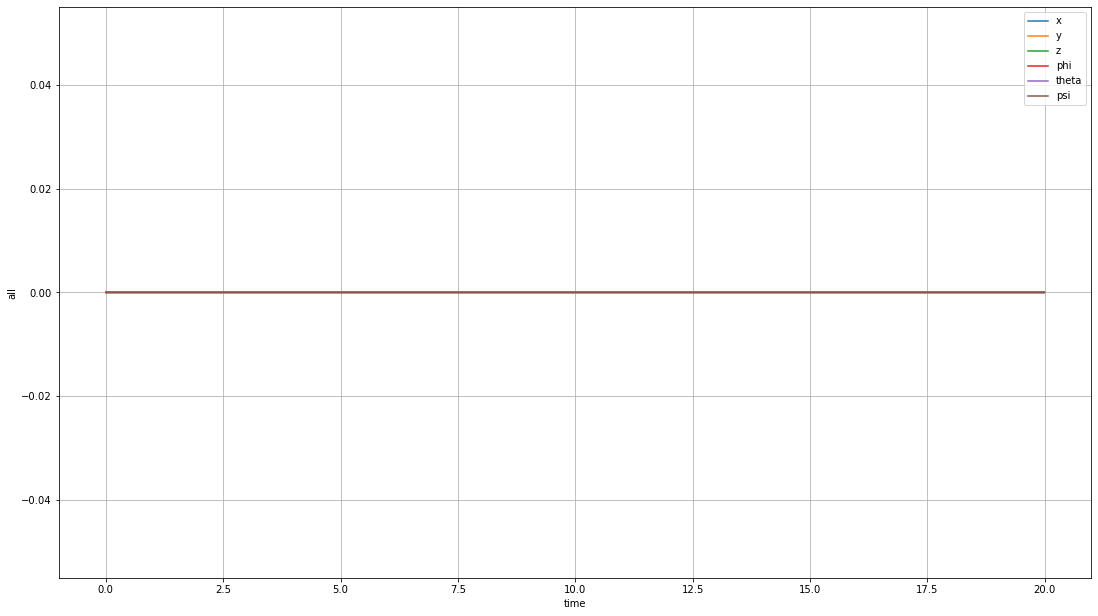

In [21]:
import math as m 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from odeintw import *
from math import pi
from math import *
from scipy.signal import place_poles
from control import *

# parameters
m, g, l = 0.4, 9.8, 0.1778
Ix, Iy, Iz = 0.002, 0.0016, 0.0035
b, d = 192.32*10**(-7), 1*10**(-7)
c = 1.9712

def model(x,t,u):
    
    u = u.reshape(4,1)
    x = x.reshape(12,1)
    
    px     = x[0]
    py     = x[1]
    pz     = x[2]
    phi    = x[3]
    theta  = x[4]
    psi    = x[5]
    dx     = x[6]
    dy     = x[7]
    dz     = x[8]
    dphi   = x[9]
    dtheta = x[10]
    dpsi   = x[11]
    
    J = np.array([[Ix,              0,                                    -Ix*sin(theta)],
                 [0,               Iy*(cos(phi))**2+Iz*(sin(phi))**2,    (Iy-Iz)*cos(phi)*sin(phi)*cos(theta)],
                 [-Ix*sin(theta),  (Iy-Iz)*cos(phi)*sin(phi)*cos(theta),  Ix*(sin(theta))**2+Iy*(sin(phi))**2*(cos(theta))**2+Iz*(cos(phi))**2*(cos(theta))**2]])
    
    c11 = 0
    c12 = (Iy-Iz)*(dtheta*cos(phi)*sin(phi)+dpsi*(sin(phi))**2*cos(theta))+(Iz-Iy)*dpsi*(cos(phi))**2*cos(theta)-Ix*dpsi*cos(theta)
    c13 = (Iz-Iy)*dpsi*(cos(theta))**2*sin(phi)*cos(phi)
    c21 = (Iz-Iy)*(dtheta*sin(phi)*cos(phi)+dpsi*(sin(phi))**2*cos(theta))+(Iy-Iz)*dpsi*(cos(phi))**2*cos(theta)+Ix*dpsi*cos(theta)
    c22 = (Iz-Iy)*dphi*cos(phi)*sin(phi)
    c23 = -Ix*dpsi*sin(theta)*cos(theta)+Iy*dpsi*(sin(phi))**2*sin(theta)*cos(theta)+Iz*dpsi*(cos(phi))**2*sin(theta)*cos(theta)
    c31 = (Iy-Iz)*dpsi*(cos(theta))**2*sin(phi)*cos(phi)-Ix*dtheta*cos(theta)
    c32 = (Iz-Iy)*(dtheta*cos(phi)*sin(phi)*sin(theta)+dphi*(sin(phi))**2*cos(theta))+(Iy-Iz)*dphi*(cos(phi))**2*cos(theta)+Ix*dpsi*sin(theta)*cos(theta)-Iy*dpsi*(sin(phi))**2*sin(theta)*cos(theta)-Iz*dpsi*(cos(phi))**2*sin(theta)*cos(theta)
    c33 = (Iy-Iz)*dphi*(cos(theta))**2*sin(phi)*cos(phi)-Iy*dtheta*(sin(phi))**2*sin(theta)*cos(theta)-Iz*dtheta*(cos(phi))**2*sin(theta)*cos(theta)+Ix*dtheta*sin(theta)*cos(theta)
 
    if c12.shape == (1,): c12 = c12[0]
    if c13.shape == (1,): c13 = c13[0]
    if c21.shape == (1,): c21 = c21[0]
    if c22.shape == (1,): c22 = c22[0]
    if c23.shape == (1,): c23 = c23[0]
    if c31.shape == (1,): c31 = c31[0]
    if c32.shape == (1,): c32 = c32[0]
    if c33.shape == (1,): c33 = c33[0]

    C = np.array([[c11, c12, c13], [c21, c22, c23], [c31, c32, c33]])

    Jinv = np.linalg.inv(J)
   
    Ucoll  = u[0] + m*g
    Uphi   = u[1]
    Utheta = u[2]
    Upsi   = u[3]
            
    ddx  = theta*g 
    ddy  = -phi*g 
    ddz  = (Ucoll-m*g)/m 
    
    ddphi   = Uphi/Ix
    ddtheta = Utheta/Iy
    ddpsi   = Upsi/Iz

    xddot = np.array([dx,dy,dz,dphi,dtheta,dpsi,ddx,ddy,ddz,ddphi,ddtheta,ddpsi])

    return xddot

# time interval/sampling time
dt = 0.01

# final time
tf = 20

# nr of samples
n = int(np.round(tf/dt))

# Desired time samples for the solution.
t = np.arange(0, tf, dt)

# initial conditions

px     = 0.0
py     = 0.0
pz     = 0.0
theta  = 0.0
phi    = 0.0
psi    = 0.0
dx     = 0.0 
dy     = 0.0 
dz     = 0.0 
dphi   = 0.0 
dtheta = 0.0 
dpsi   = 0.0 

x0 = np.array([[px], [py], [pz], [phi], [theta], [psi], [dx], [dy], [dz], [dphi], [dtheta], [dpsi]])

plotx     = np.zeros(n)
ploty     = np.zeros(n)
plotz     = np.zeros(n)
plotphi   = np.zeros(n)
plottheta = np.zeros(n)
plotpsi   = np.zeros(n)

u = np.zeros((4,n))


K = np.array([[24.7267,  0.0001, 22.1294, -0.0002, 54.2482, -0.0000, 22.3994,  0.0001, 10.8415, -0.0000,  2.0236, -0.0000],
[-0.0000, -0.3909, -0.0000,  1.2201, -0.0000,  0.0001, -0.0000, -0.4084, -0.0000,  0.0914, -0.0000,  0.0000],
[0.3998,  0.0000,  0.0000, -0.0000,  1.0992, -0.0000,  0.3919,  0.0000,  0.0000, -0.0000,  0.0776, -0.0000],
[0.0000, -0.1374,  0.0000,  0.0665,  0.0000,  0.1457,  0.0000, -0.0783,  0.0000,  0.0016,  0.0000,  0.0773]])

# references

# integrator parameters

px_prev    = 0
py_prev    = 0
pz_prev    = 0
phi_prev   = 0
theta_prev = 0
psi_prev   = 0

dx = 0
dy = 0
dz = 0
dphi = 0
dtheta = 0
dpsi = 0

xerror = 0
yerror = 0
zerror = 0

# solve ODE for each step
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    
    #state feedback

   
    #state feedback & follow

    
    # solve for next step
    x = odeintw(model,x0,tspan,args=(u[:,i],))
    
    # store solution for plotting
    px    = x[1][0,0]
    py    = x[1][1,0]
    pz    = x[1][2,0]
    phi   = x[1][3,0]
    theta = x[1][4,0]
    psi   = x[1][5,0]
    
    dx     = (px - px_prev)/dt
    dy     = (py - py_prev)/dt
    dz     = (pz - pz_prev)/dt
    dphi   = (phi - phi_prev)/dt
    dtheta = (theta - theta_prev)/dt
    dpsi   = (psi - psi_prev)/dt

    # next initial condition 
    x0 = np.array([px, py, pz, phi, theta, psi, dx, dy, dz, dphi, dtheta, dpsi]).reshape(12,1)

    px_prev    = px
    py_prev    = py
    pz_prev    = pz
    phi_prev   = phi
    theta_prev = theta
    psi_prev   = psi
    
    plotx[i] = px
    ploty[i] = py
    plotz[i] = pz
    plotphi[i] = phi
    plottheta[i] = theta
    plotpsi[i] = psi

    
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.plot(t, plotx,  label='x')
plt.plot(t, ploty,  label='y')
plt.plot(t, plotz,  label='z')
plt.plot(t, plotphi,  label='phi')
plt.plot(t, plottheta,  label='theta')
plt.plot(t, plotpsi, label='psi')

plt.legend(loc='best')
plt.ylabel('all')
plt.xlabel('time')
plt.grid(True)

plt.show()
  
# fig = plt.figure()

# plt.plot(plotx, ploty,  label='trajectory')

# plt.legend(loc='best')
# plt.ylabel('py')
# plt.xlabel('px')
# plt.grid(True)

# plt.show()